In [94]:
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../../travelhack6.csv')
print(df.columns)
df.head()

Index(['Пол', 'День рождения', 'Возраст клиента', 'Заявка № ',
       'Дата бронирования', 'Дата начала тура', 'Год', 'Ночей', 'Вид тура',
       'Тип заявки', 'Страна тура', 'Регион отеля', 'Туристов',
       'Туристы, взрослые', 'Туристы, дети', 'Младенцы', 'Звездность',
       'Состав группы (Заявка) (Заявка)', 'Сумма в $', 'Наименование тура',
       'ИД клиента', 'Глубина продаж', 'Тип питания', 'Город Отеля',
       'Город отправления'],
      dtype='object')


,Пол,День рождения,Возраст клиента,Заявка №,Дата бронирования,Дата начала тура,Год,Ночей,Вид тура,Тип заявки,...,Младенцы,Звездность,Состав группы (Заявка) (Заявка),Сумма в $,Наименование тура,ИД клиента,Глубина продаж,Тип питания,Город Отеля,Город отправления
0,мужской,2018-08-28 00:00:00,2.0,4803671,2021-02-07 20:44:00,2021-05-04 00:00:00,2021,12,Пляжный отдых,Пакет,...,0,4*,Семья,1718.64,Turkey Antalya LED,4197428,85.136111,All Inclusive,NaN,Санкт-Петербург
1,мужской,1991-04-25 00:00:00,29.0,4803671,2021-02-07 20:44:00,2021-05-04 00:00:00,2021,12,Пляжный отдых,Пакет,...,0,4*,Семья,1718.64,Turkey Antalya LED,4197429,85.136111,All Inclusive,NaN,Санкт-Петербург
2,мужской,1980-11-05 00:00:00,40.0,4803915,2021-02-08 09:03:00,2021-03-04 00:00:00,2021,6,Пляжный отдых,Пакет,...,0,5*,Семья,948.45,Turkey Antalya MOW,4197517,23.622917,AIP,Боазкент,Москва
3,мужской,2013-02-27 00:00:00,8.0,4806034,2021-02-08 19:46:00,2021-10-09 00:00:00,2021,11,Пляжный отдых,Пакет,...,0,5*,Семья,2128.15,Turkey Antalya MOW,4197718,242.176389,UAI,Текирова,Москва
4,мужской,1968-10-06 00:00:00,52.0,4806034,2021-02-08 19:46:00,2021-10-09 00:00:00,2021,11,Пляжный отдых,Пакет,...,0,5*,Семья,2128.15,Turkey Antalya MOW,4197719,242.176389,UAI,Текирова,Москва


In [7]:
for c in ['День рождения', 'Дата бронирования', 'Дата начала тура']:
    df[c] = pd.to_datetime(df[c], format='%Y-%m-%d %H:%M:%S')
df[['День рождения', 'Дата бронирования', 'Дата начала тура']].head()

,День рождения,Дата бронирования,Дата начала тура
0,2018-08-28,2021-02-07 20:44:00,2021-05-04
1,1991-04-25,2021-02-07 20:44:00,2021-05-04
2,1980-11-05,2021-02-08 09:03:00,2021-03-04
3,2013-02-27,2021-02-08 19:46:00,2021-10-09
4,1968-10-06,2021-02-08 19:46:00,2021-10-09


In [13]:
star_map = {
    '5*': 5,
    '4*': 4,
    '3*': 3,
    '2*': 2,
    '-': np.nan,
    '4*+': 4,
    '3*+': 3,
    'apt': 'apt',
    '0': np.nan,
    'HV1': 'HV',
    'Без звёзд': np.nan,
    'HV': 'HV',
    'HV2': 'HV',
    '3*-4*': 3,
    'BOUTIQUE': np.nan,
    '1*': 1,
    '2*super': 2,
    '2*+': 2,
    'Guest House': 'apt',
    'Std Apt': 'apt',
    '5*+': 5,
    '2*-3*': 2,
    '5* Deluxe': 5,
    '4*-5*': 4,
    'S-CLASS': np.nan,
    '3*super': 3,
    'SC': 'apt',
    'cat A': 4,
    'cat B': 3,
}

df['Звездность_fix'] = df['Звездность'].map(star_map)
df['Звездность_fix'].value_counts()

5      61344
4      27659
3      16269
2       1574
HV       764
apt      516
1         71
Name: Звездность_fix, dtype: int64

In [14]:
foods = df['Тип питания'].unique()
food_map = {
    'UAI': [
        'UAI', 'Ultra All Exclusive', 'All Inclusive Ultra', 'ULTRA ALL INCLUSIVE PLUS', 'Ultimate All Inclusive',
        'PREMIER ULTRA ALL INCLUSIVE', 'PREMIUM ALA CARTE ALL INCLUSIVE', 'Golden All Inclusive',
        'Platinum Plan All inclusive', 'SUPERIOR ALL INCLUSIVE', 'All Inclusive Premium',
        'ULTRA ALL INCLUSIVE WITH HIGH LEVEL', 'Emerald All Inclusive', 'Gold All Inclusive',
        'Super All Inclusive', 'All Inc Ultra Luxury', 'Diamond AI', 'PREMIUM ULTRA ALL INCLUSIVE',
        'AIP', 'AIS', 'Crystal Package',  'PRIVILEGED LIFE', 'Pure Indulgence Dine Around', 'Serenity Plan',
        'PRE.AI.LIFE STYLE', 'Premium All Inclusive', 'PALAZZO ALL INCLUSIVE'
    ],
    'AI': [
        'AI', 'All Inclusive', 'All Inclusive Dine Around',
        'Basic All Inclusive', 'Soft All Inclusive', "A'LA CARTE ALL INCLUSIVE", 'Light All Inclusive', 
        'All Inclusive Aqua', 'Limited all Inclusive', 'Island Plan All Inclusive',
        'Full Dine Around All Inclusive', 'VARU ALL INCLUSIVE', 'All inclusive Style',
        'All Inclusive Lite',  'Все включено СЕМЕЙНЫЙ', 'Все включено ПЛЯЖНЫЙ',
        'AI Light', 'AI NON ALCOHOL', 'ALL IN CONCEPT', 
        'LAI', 'LAI HB', 'FAI','DAI', 'DDAI', 'EAI', 'HB AI', 'FB AI', 'LAI FB', 'MAI'
    ],
    'FB': [
        'FB', 'BB+FB', 'FB + Оздоровит. путевка', 'FB+',  'FB + Лечение',
        'FB Beverage', 'FB + Общетерапевт.путевка',
        'FB + Антистресс', 'FB + Оздоровительная', 'FB + Отдых', 'FBT',
        'FB ресторан «Алтай» + Лечебная путевка', 'FB + Gala Dinner',
        'Полный пансион', 'Полный пансион + Лечение', 'Полный Пансион (шведский стол) + Отдых',
        'Полный Пансион+Отдых бассейн с термотерапией', 'Полный пансион+ Общетерапевтическая Лайт',
        'Полный пансион + Общетерапевтическая с Мацестой', 'Полный пансион + Общетерапевтическая без Мацесты',
        'Полный пансион + путевка Курортная', 'Полный Пансион + Смарт путевка', 'Полный Пансион + Серебряный возраст',
        'Full Board + drinks', 'Full Board Premium', 'Full Board Treatment Relax', 'Оздоровительная.',
        'FBp - Завтрак, обед, ужин (Premium)'
    ],
    'HB': [
        'HB', 'HB (завтрак+ужин)', 'HB + Оздоровит. путевка', 'HB+', 'HB Plus',
        'HB (завтрак+обед)', 'HB Beverage', 'BB+HB', 'HBT', 'HB + Лечение',
        'PR - Завтрак, ужин (Premium)',
        'Полупансион (завтрак+ужин)', 'Half Board Platinum', 'Half board + drinks',
        'Half Board Dine Around', 'Half Board Premium', 'Half Board Beach', 'Half Board Treatment Relax'
    ],
    'BB': [
        'Завтрак', 'BB', 'BB Continental', 'BB + Оздоровит. путевка', 'BB Пляжный',
        'Breakfast', 'Bed And Breakfast Plus'
    ],
    'RO': [
        'RO', 'RO + Оздоровительная курсовка', 'RO + Оздоровительная путевка', 'Only Bed', 'Bed Only', 'Без питания'
    ]
}
t = [vv for v in food_map.values() for vv in v]
print(len(t) == len(set(t)))
set(foods) - set([vv for v in food_map.values() for vv in v])

True


{'0',
 'AXI',
 'Al + лечение',
 'As Per Program',
 'HCI',
 'HEA',
 'LUXME',
 'SC',
 nan,
 'По программе',
 'По программе +'}

In [16]:
def fix_food(f):
    for key in food_map:
        if f in food_map[key]:
            return key
df['Тип питания fix'] = df['Тип питания'].apply(fix_food)
df['Тип питания fix'].value_counts()

AI     44930
UAI    30551
HB     12459
BB     11874
FB      3336
RO      2362
Name: Тип питания fix, dtype: int64

In [18]:
df[['Страна тура', 'Регион отеля', 'Город Отеля']].drop_duplicates()

,Страна тура,Регион отеля,Город Отеля
0,Турция,NaN,NaN
2,Турция,Белек,Боазкент
3,Турция,Кемер,Текирова
9,Турция,Аланья,Аланья
11,Кипр,Протарас,Протарас
...,...,...,...
197910,Италия,Искья,Лакко-Амено
200487,Таиланд,Самуи,Талинг Нгам
203183,Греция,Корфу,Канони
207399,Италия,Оз. Комо,Комо


In [21]:
df.isnull().sum()

Пол                                     0
День рождения                         429
Возраст клиента                       429
Заявка №                                0
Дата бронирования                       0
Дата начала тура                        0
Год                                     0
Ночей                                   0
Вид тура                              940
Тип заявки                              0
Страна тура                           940
Регион отеля                       110421
Туристов                                0
Туристы, взрослые                       0
Туристы, дети                           0
Младенцы                                0
Звездность                          99347
Состав группы (Заявка) (Заявка)         0
Сумма в $                               0
Наименование тура                       0
ИД клиента                              0
Глубина продаж                          0
Тип питания                         99347
Город Отеля                       

In [44]:
df.apply(lambda x: x['День рождения'],axis=1)

0        2018-08-28
1        1991-04-25
2        1980-11-05
3        2013-02-27
4        1968-10-06
            ...    
209604   1980-08-20
209605   1995-07-10
209606   2006-03-21
209607   1970-08-24
209608   1980-07-04
Length: 209609, dtype: datetime64[ns]

<AxesSubplot:>

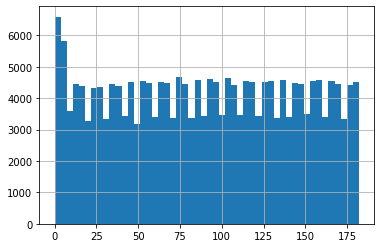

In [111]:
def time_diff(row):
    d1 = row['День рождения'].day_of_year
    d2 = row['Дата начала тура'].day_of_year
    if d1>d2: d2,d1=d1,d2
    return d2-d1 if d2-d1<183 else d1+365-d2
df['Начало тура ДР'] = df.apply(time_diff, axis=1)
df['Начало тура ДР'].hist(bins=50);

<AxesSubplot:>

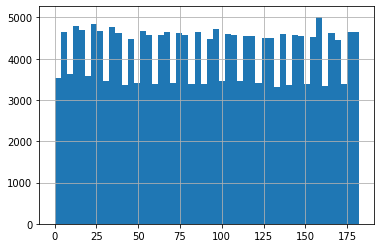

In [112]:
def time_diff(row):
    d1 = row['День рождения'].day_of_year
    d2 = row['Дата бронирования'].day_of_year
    if d1>d2: d2,d1=d1,d2
    return d2-d1 if d2-d1<183 else d1+365-d2
df['Бронь ДР'] = df.apply(time_diff, axis=1)
df['Бронь ДР'].hist(bins=50);

In [68]:
df = df.rename(columns={
    'Состав группы (Заявка) (Заявка)': 'Состав группы',
    'Заявка № ': 'Заявка',
    'Сумма в $': 'Сумма',
    'Город Отеля': 'Город отеля'
})

In [67]:
df.columns

Index(['Пол', 'День рождения', 'Возраст клиента', 'Заявка',
       'Дата бронирования', 'Дата начала тура', 'Год', 'Ночей', 'Вид тура',
       'Тип заявки', 'Страна тура', 'Регион отеля', 'Туристов',
       'Туристы, взрослые', 'Туристы, дети', 'Младенцы', 'Звездность',
       'Состав группы', 'Сумма', 'Наименование тура', 'ИД клиента',
       'Глубина продаж', 'Тип питания', 'Город Отеля', 'Город отправления',
       'Звездность_fix', 'Тип питания fix', 'Начало тура ДР', 'Бронь ДР'],
      dtype='object')

In [75]:
df['Месяц Бронирования'] = df['Дата бронирования'].apply(lambda x: x.month)
df['Месяц Выезда'] = df['Дата бронирования'].apply(lambda x: x.month)

In [78]:
df_ = df.copy()

In [90]:
df.groupby('ИД клиента')['Состав группы'].nunique().value_counts()

1    190720
2      2497
3        59
Name: Состав группы, dtype: int64

datetime.timedelta(days=10800)

In [102]:

df['Дата бронирования'] -  datetime.timedelta(30*360)

0        1991-07-15 20:44:00
1        1991-07-15 20:44:00
2        1991-07-16 09:03:00
3        1991-07-16 19:46:00
4        1991-07-16 19:46:00
                 ...        
209604   1991-07-04 14:47:00
209605   1991-07-04 16:43:00
209606   1991-07-05 19:41:00
209607   1991-01-31 20:53:00
209608   1991-07-06 16:21:00
Name: Дата бронирования, Length: 209609, dtype: datetime64[ns]

In [103]:
df['День рождения'].isnull().sum()

429

In [105]:
df.loc[df['Возраст клиента']>100, 'День рождения'] = np.nan
df.loc[df['Возраст клиента']>100, 'Возраст клиента'] = np.nan

df['День рождения'].fillna(df['Дата бронирования'] -  datetime.timedelta(30*360), inplace=True)
df['Возраст клиента'].fillna(30, inplace=True)

In [ ]:
df[df['Страна тура'].isnull()]

In [174]:
f = [
    'ИД клиента',
    'Пол',
    'Возраст клиента',
    'Начало тура ДР',
    'Месяц Бронирования',
    'Месяц Выезда',
    'Туристов',
    'Туристы, взрослые',
    'Туристы, дети',
    'Младенцы',
    'Состав группы',
    'Город отправления'
]

t = [
    'Ночей',
    'Сумма',
    'Звездность_fix',
    'Тип питания fix',
    'Страна тура',
    'Регион отеля',
    'Город отеля',
]

In [168]:
df[tt].astype(str).isnull().sum()

0

In [175]:
t[2:]

['Звездность_fix',
 'Тип питания fix',
 'Страна тура',
 'Регион отеля',
 'Город отеля']

In [193]:
pd.concat([pd.Series('nan'), df[tt].astype(str)])

0                 nan
0                 nan
1                 nan
2            Боазкент
3            Текирова
             ...     
209604            nan
209605           Лара
209606            nan
209607    Белек Центр
209608            nan
Length: 209610, dtype: object

In [201]:
pd.concat([pd.Series('nan'), df[tt].astype(str)])

0         nan
0           4
1           4
2           5
3           5
         ... 
209604     HV
209605      4
209606      5
209607      5
209608      5
Length: 209610, dtype: object

['nan', '4', '5', '3', 'HV', '2', 'apt', '1']

In [208]:
enc = {}
for tt in t[2:]:
    l = df[tt].astype(str).unique().tolist()
    l = [x for x in l if x!='nan']
    l.insert(0, 'nan')
    enc[tt] = l
    df[tt + '_enc'] = df[tt].astype(str).apply(lambda x: l.index(x))

In [217]:
for tt in ['ИД клиента', 'Состав группы', 'Город отправления']:
    l = df[tt].unique().tolist()
    enc[tt] = l
    df[tt + '_enc'] = df[tt].apply(lambda x: l.index(x))

In [212]:
t_enc = [
    'Ночей',
    'Сумма',
    'Звездность_fix_enc',
    'Тип питания fix_enc',
    'Страна тура_enc',
    'Регион отеля_enc',
    'Город отеля_enc',
]

In [84]:
df['Пол'] = (df['Пол']=='мужской').astype(int)
df['Пол'].value_counts()

0    124300
1     85309
Name: Пол, dtype: int64

In [ ]:
cat_features

In [83]:
pd.get_dummies(df['Состав группы'], prefix='Состав группы')

,Состав группы_Группа,Состав группы_Дети без взрослых,Состав группы_Одиночки,Состав группы_Пары,Состав группы_Семья
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
209604,0,0,1,0,0
209605,0,0,0,1,0
209606,0,0,0,1,0
209607,0,0,0,1,0


In [85]:
df[features+targets]

,Пол,Возраст клиента,Начало тура ДР,Месяц Бронирования,Месяц Выезда,Туристов,"Туристы, взрослые","Туристы, дети",Младенцы,Состав группы,Звездность_fix,Тип питания fix,Ночей,Сумма,Страна тура,Регион отеля,Город отеля
0,1,2.0,116.0,2,2,4,2,2,0,Семья,4,AI,12,1718.64,Турция,NaN,NaN
1,1,29.0,9.0,2,2,4,2,2,0,Семья,4,AI,12,1718.64,Турция,NaN,NaN
2,1,40.0,118.0,2,2,3,2,1,0,Семья,5,UAI,6,948.45,Турция,Белек,Боазкент
3,1,8.0,141.0,2,2,3,2,1,0,Семья,5,UAI,11,2128.15,Турция,Кемер,Текирова
4,1,52.0,2.0,2,2,3,2,1,0,Семья,5,UAI,11,2128.15,Турция,Кемер,Текирова
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209604,0,40.0,117.0,1,1,1,1,0,0,Одиночки,HV,AI,6,468.29,Турция,NaN,NaN
209605,0,25.0,1.0,1,1,2,2,0,0,Пары,4,AI,9,1008.25,Турция,Анталья,Лара
209606,0,15.0,41.0,1,1,2,2,0,0,Пары,5,UAI,14,1622.84,Турция,NaN,NaN
209607,0,50.0,14.0,8,8,2,2,0,0,Пары,5,AI,10,2435.55,Турция,Белек,Белек Центр


<AxesSubplot:>

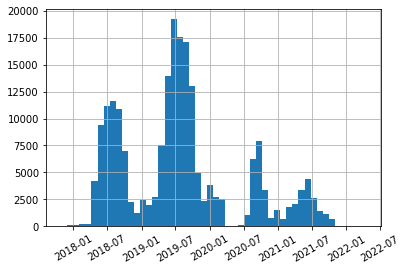

In [117]:
plt.xticks(rotation=30)
df['Дата начала тура'].hist(bins=50)

In [113]:
df[f+t].isnull().sum()

ИД клиента                 0
Пол                        0
Возраст клиента            0
Начало тура ДР             0
Месяц Бронирования         0
Месяц Выезда               0
Туристов                   0
Туристы, взрослые          0
Туристы, дети              0
Младенцы                   0
Состав группы              0
Город отправления          0
Звездность_fix        101412
Тип питания fix       104097
Ночей                      0
Сумма                      0
Страна тура              940
Регион отеля          110421
Город отеля           110421
dtype: int64

{'Абано-Терме': 'Италия',
 'Абу-Даби городские отели': 'ОАЭ',
 'Авсаллар': 'Турция',
 'Агиос Георгиос Аргирадес (юг)': 'Греция',
 'Агиос Иоаннис Перистерон': 'Греция',
 'Агиос Николаос (Халкидики)': 'Греция',
 'Агиос Николаос (о. Крит)': 'Греция',
 'Агия Параскеви': 'Греция',
 'Агия Пелагия': 'Греция',
 'Ада Бояна': 'Черногория',
 'Адду Атолл': 'Мальдивы',
 'Аделе': 'Греция',
 'Адельянос Кампос': 'Греция',
 'Аджису': 'Турция',
 'Аджман городские отели': 'ОАЭ',
 'Аджман пляжные отели': 'ОАЭ',
 'Адлер': 'Россия',
 'Айя-Напа': 'Кипр',
 'Акаба': 'Иордания',
 'Аксарай': 'Турция',
 'Акти Эльяс': 'Греция',
 'Акьярлар': 'Турция',
 'Аланья': 'Турция',
 'Албена': 'Болгария',
 'Албуфейра': 'Португалия',
 'Аликанте': 'Испания',
 'Альба ди Канацеи': 'Италия',
 'Алькудия': 'Испания',
 'Амбалангода': 'Шри-Ланка',
 'Амудара': 'Греция',
 'Аналипсис': 'Греция',
 'Анапа': 'Россия',
 'Андорра': 'Андорра',
 'Андорра-ла-Велья': 'Андорра',
 'Аниссарас': 'Греция',
 'Анталья': 'Турция',
 'Ао Нанг': 'Таиланд',


In [158]:
df.loc[df['Страна тура'].isnull(), 'Город отеля'].map(df.groupby('Город отеля')['Страна тура'].first().to_dict()).value_counts(dropna=False)

NaN                         912
Италия                       14
Доминиканская Республика      4
Таиланд                       2
Франция                       2
Португалия                    2
Турция                        2
Эстония                       2
Name: Город отеля, dtype: int64

In [162]:
df.groupby('Город отеля')['Страна тура'].first().to_dict()

{'Абано-Терме': 'Италия',
 'Абу-Даби городские отели': 'ОАЭ',
 'Авсаллар': 'Турция',
 'Агиос Георгиос Аргирадес (юг)': 'Греция',
 'Агиос Иоаннис Перистерон': 'Греция',
 'Агиос Николаос (Халкидики)': 'Греция',
 'Агиос Николаос (о. Крит)': 'Греция',
 'Агия Параскеви': 'Греция',
 'Агия Пелагия': 'Греция',
 'Ада Бояна': 'Черногория',
 'Адду Атолл': 'Мальдивы',
 'Аделе': 'Греция',
 'Адельянос Кампос': 'Греция',
 'Аджису': 'Турция',
 'Аджман городские отели': 'ОАЭ',
 'Аджман пляжные отели': 'ОАЭ',
 'Адлер': 'Россия',
 'Айя-Напа': 'Кипр',
 'Акаба': 'Иордания',
 'Аксарай': 'Турция',
 'Акти Эльяс': 'Греция',
 'Акьярлар': 'Турция',
 'Аланья': 'Турция',
 'Албена': 'Болгария',
 'Албуфейра': 'Португалия',
 'Аликанте': 'Испания',
 'Альба ди Канацеи': 'Италия',
 'Алькудия': 'Испания',
 'Амбалангода': 'Шри-Ланка',
 'Амудара': 'Греция',
 'Аналипсис': 'Греция',
 'Анапа': 'Россия',
 'Андорра': 'Андорра',
 'Андорра-ла-Велья': 'Андорра',
 'Аниссарас': 'Греция',
 'Анталья': 'Турция',
 'Ао Нанг': 'Таиланд',


In [161]:
df.loc[df['Страна тура'].isnull(), 'Город отеля'].map(df.groupby('Город отеля')['Страна тура'].first().to_dict())

912

In [160]:
df.loc[df['Страна тура'].isnull()].shape

(940, 31)

In [163]:
df[~df['Город отеля'].isnull() & df['Страна тура'].isnull()][['Город отеля', 'Страна тура']].sort_values('Город отеля')

(41, 31)

In [122]:
df[df['Звездность_fix'].isnull() & df['Тип питания fix'].isnull() & df['Город отеля'].isnull()]

,Пол,День рождения,Возраст клиента,Заявка,Дата бронирования,Дата начала тура,Год,Ночей,Вид тура,Тип заявки,...,Глубина продаж,Тип питания,Город отеля,Город отправления,Звездность_fix,Тип питания fix,Начало тура ДР,Бронь ДР,Месяц Бронирования,Месяц Выезда
244,1,1967-01-31,54.0,4829403,2021-02-17 15:35:00,2021-08-14,2021,14,Пляжный отдых,Пакетные туры Mouzenidis,...,177.350694,0,NaN,Москва,NaN,None,170,17,2,2
245,1,2004-10-15,16.0,4829403,2021-02-17 15:35:00,2021-08-14,2021,14,Пляжный отдых,Пакетные туры Mouzenidis,...,177.350694,0,NaN,Москва,NaN,None,63,124,2,2
383,1,2008-08-19,12.0,4832666,2021-02-18 14:29:00,2021-05-02,2021,0,Продажа дополнительных услуг,Дополнительные услуги отдельно,...,72.396528,NaN,NaN,Анталья,NaN,None,110,182,2,2
384,1,1975-11-02,45.0,4832666,2021-02-18 14:29:00,2021-05-02,2021,0,Продажа дополнительных услуг,Дополнительные услуги отдельно,...,72.396528,NaN,NaN,Анталья,NaN,None,181,108,2,2
385,1,1977-08-19,43.0,4832666,2021-02-18 14:29:00,2021-05-02,2021,0,Продажа дополнительных услуг,Дополнительные услуги отдельно,...,72.396528,NaN,NaN,Анталья,NaN,None,109,182,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209529,0,1972-01-03,49.0,4777216,2021-01-26 00:00:00,2021-07-05,2021,5,Круиз,Круиз,...,160.000000,0,NaN,Москва,NaN,None,182,23,1,1
209532,0,1991-08-14,29.0,4777275,2021-01-26 17:12:00,2021-02-07,2021,7,Пляжный отдых,Билеты чартерные,...,11.283333,NaN,NaN,Москва,NaN,None,177,165,1,1
209567,0,1975-02-04,46.0,4778988,2021-01-27 15:03:00,2021-02-06,2021,8,Продажа дополнительных услуг,Дополнительные услуги отдельно,...,9.372917,NaN,NaN,Анталья,NaN,None,2,8,1,1
209578,0,1987-11-02,33.0,4776231,2021-01-26 11:08:00,2021-02-13,2021,0,Only Tickets,Билеты чартерные,...,17.536111,NaN,NaN,Москва,NaN,None,103,85,1,1


In [88]:
df.groupby('ИД клиента').size().value_counts()

1    179493
2     11802
3      1568
4       312
5        65
6        22
7        10
8         3
9         1
dtype: int64

In [268]:
q = df.groupby('ИД клиента').size()
multi_client = q[q>1].index

In [273]:
test_index = df[df['ИД клиента'].isin(multi_client)].sample(frac=1).drop_duplicates('ИД клиента').index

In [220]:
f_enc = [
    'ИД клиента_enc',
    'Пол',
    'Возраст клиента',
    'Начало тура ДР',
    'Месяц Бронирования',
    'Месяц Выезда',
    'Туристов',
    'Туристы, взрослые',
    'Туристы, дети',
    'Младенцы',
    'Состав группы_enc',
    'Город отправления_enc'
]

In [250]:
norm = {}
for feature in f_enc + t_enc:
    if not '_enc' in feature:
        norm[feature] = {'mean': df[feature].mean(), 'std': df[feature].std()}
        df[feature+'_norm'] = (df[feature] - norm[feature]['mean'])/norm[feature]['std']

In [255]:
f_enc_norm = [
    'ИД клиента_enc',
    'Пол',
    'Возраст клиента_norm',
    'Начало тура ДР_norm',
    'Месяц Бронирования_norm',
    'Месяц Выезда_norm',
    'Туристов_norm',
    'Туристы, взрослые_norm',
    'Туристы, дети_norm',
    'Младенцы_norm',
    'Состав группы_enc',
    'Город отправления_enc'
]

In [256]:
t_enc_norm = [
    'Ночей_norm',
    'Сумма_norm',
    'Звездность_fix_enc',
    'Тип питания fix_enc',
    'Страна тура_enc',
    'Регион отеля_enc',
    'Город отеля_enc'
]

In [372]:
t_enc_norm

['Ночей_norm',
 'Сумма_norm',
 'Звездность_fix_enc',
 'Тип питания fix_enc',
 'Страна тура_enc',
 'Регион отеля_enc',
 'Город отеля_enc']

In [373]:
x_train, y_train = df.loc[~df.index.isin(test_index), f_enc_norm].values, df.loc[~df.index.isin(test_index), t_enc_norm].values
x_test, y_test = df.loc[test_index, f_enc_norm].values, df.loc[test_index, t_enc_norm].values
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((195826, 12), (195826, 7), (13783, 12), (13783, 7))

In [277]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, Model, backend as K

In [247]:
df['Город отправления_enc'].max()

226

In [407]:
inp_client = layers.Input(shape=(1,))
emb_client = layers.Embedding(193276, 64)(inp_client)
emb_client = layers.Flatten()(emb_client)

inp_num = layers.Input(shape=(9,))


inp_sostav = layers.Input(shape=(1,))
emb_sostav = layers.Embedding(5, 5)(inp_sostav)
emb_sostav = layers.Flatten()(emb_sostav)

inp_gorod = layers.Input(shape=(1,))
emb_gorod = layers.Embedding(227, 50)(inp_gorod)
emb_gorod = layers.Flatten()(emb_gorod)

l = layers.Concatenate()([emb_client, emb_gorod, emb_sostav, inp_num])
l = layers.Dense(256, activation='relu')(l)
l = layers.Dense(256, activation='relu')(l)

out_all = layers.Dense(2)(l)
out_zvezd = layers.Dense(1)(l)
out_pit = layers.Dense(1)(l)
out_strana = layers.Dense(1)(l)
out_region = layers.Dense(1)(l)
out_gorod = layers.Dense(1)(l)


model_all = Model([inp_client, inp_num, inp_sostav, inp_gorod], out_all)
model_zvezd = Model([inp_client, inp_num, inp_sostav, inp_gorod], out_zvezd)
model_pit = Model([inp_client, inp_num, inp_sostav, inp_gorod], out_pit)
model_strana = Model([inp_client, inp_num, inp_sostav, inp_gorod], out_strana)
model_region = Model([inp_client, inp_num, inp_sostav, inp_gorod], out_region)
model_gorod = Model([inp_client, inp_num, inp_sostav, inp_gorod], out_gorod)


model_all.summary()
model_zvezd.summary()
model_pit.summary()
model_strana.summary()
model_region.summary()
model_gorod.summary()

Model: "functional_52"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_50 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_53 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_52 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_33 (Embedding)        (None, 1, 64)        12369664    input_50[0][0]                   
______________________________________________________________________________________

In [408]:
f_enc_norm

['ИД клиента_enc',
 'Пол',
 'Возраст клиента_norm',
 'Начало тура ДР_norm',
 'Месяц Бронирования_norm',
 'Месяц Выезда_norm',
 'Туристов_norm',
 'Туристы, взрослые_norm',
 'Туристы, дети_norm',
 'Младенцы_norm',
 'Состав группы_enc',
 'Город отправления_enc']

In [ ]:
inp_client, inp_num, inp_sostav, inp_gorod

In [409]:
def nan_sparse_ce(y_true, y_pred):
    K.sparse_categorical_crossentropy(y_true, y_pred*(y_true>0), from_logits=True)
    
model_all.compile(loss='mse', optimizer='adam')
model_zvezd.compile(loss=nan_sparse_ce, optimizer='adam')
model_pit.compile(loss=nan_sparse_ce, optimizer='adam')
model_strana.compile(loss=nan_sparse_ce, optimizer='adam')
model_region.compile(loss=nan_sparse_ce, optimizer='adam')
model_gorod.compile(loss=nan_sparse_ce, optimizer='adam')

In [410]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

In [316]:
t_enc_norm

['Ночей_norm',
 'Сумма_norm',
 'Звездность_fix_enc',
 'Тип питания fix_enc',
 'Страна тура_enc',
 'Регион отеля_enc',
 'Город отеля_enc']

In [400]:
f_enc_norm

['ИД клиента_enc',
 'Пол',
 'Возраст клиента_norm',
 'Начало тура ДР_norm',
 'Месяц Бронирования_norm',
 'Месяц Выезда_norm',
 'Туристов_norm',
 'Туристы, взрослые_norm',
 'Туристы, дети_norm',
 'Младенцы_norm',
 'Состав группы_enc',
 'Город отправления_enc']

In [417]:
models = [
    ['model_all', model_all, [0,1], keras.optimizers.Adam(), keras.losses.mean_squared_error, keras.metrics.mean_squared_error],
    ['model_zvezd', model_zvezd, [2], keras.optimizers.Adam(), nan_sparse_ce, keras.metrics.SparseCategoricalAccuracy()],
    ['model_pit', model_pit, [3], keras.optimizers.Adam(), nan_sparse_ce, keras.metrics.SparseCategoricalAccuracy()],
    ['model_strana', model_strana, [4], keras.optimizers.Adam(), nan_sparse_ce, keras.metrics.SparseCategoricalAccuracy()],
    ['model_region', model_region, [5], keras.optimizers.Adam(), nan_sparse_ce, keras.metrics.SparseCategoricalAccuracy()],
    ['model_gorod', model_gorod, [6], keras.optimizers.Adam(), nan_sparse_ce, keras.metrics.SparseCategoricalAccuracy()],
]

In [418]:
model_names = [k[0] for k in models]
model_names

['model_all',
 'model_zvezd',
 'model_pit',
 'model_strana',
 'model_region',
 'model_gorod']

In [423]:
from functools import partial
from tqdm.notebook import tqdm


@tf.function
def train_step(x, y, model, optimizer, loss_fn):
    x = [tf.gather(x, inp, axis=1) for inp in [[0], list(range(1,10)), [10], [11]]]
    with tf.GradientTape() as tape:
        out = model(x, training=True)
        loss_value = loss_fn(y, out)
    grads = tape.gradient(loss_value, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
#     train_acc_metric.update_state(y, logits)
    return loss_value

@tf.function
def test_step(x, y, model, metric):
    x = [tf.gather(x, inp, axis=1) for inp in [[0], list(range(1,10)), [10], [11]]]
    logits = model(x, training=False)
    metric.update_state(y, logits)

def tf_train(epochs, history=None, plot_every=None, progress=True):
#     history = history or {
#         'train_accs': [],
#         'train_losses': [],
#         'test_accs': [],
#         'test_losses': [],
#     }
    tqdm_ = partial(tqdm,
                disable=not progress, # не показывать бар вообще
                leave=False) # убрать бар после окончания
    
    for epoch in range(epochs):
        print(f'epoch {epoch}')
        for (name, model, i, optimizer, loss, metric) in models:
                for batch, (x_train_batch, y_train_batch) in enumerate(tqdm_(train_dataset, desc=f'train')):
#                     print(model, batch)
#                     breakpoint()
                    train_step(x_train_batch, tf.gather(y_train_batch, i, axis=1), model, optimizer, loss)

        train_losses = {n: [] for n in model_name}
        for (name, model, i, optimizer, loss, metric) in models:
            for batch, (x_train_batch, y_train_batch) in enumerate(tqdm_(train_dataset, desc=f'eval')):
                    print(model, batch)
                    train_losses[name].append(test_step(x_train_batch, tf.gather(y_train_batch, i, axis=1), model, optimizer, metric))
#             history['train_accs'].append(float(train_acc_metric.result()))
#             history['train_losses'].append(float(loss_metric.result()))

        test_losses = {n: [] for n in model_name}
        for (name, model, i, optimizer, loss, metric) in models:
            for batch, (x_test_batch, y_test_batch) in enumerate(tqdm_(test_dataset, desc=f'eval')):
                print(model, batch)
                test_losses[name].append(test_step(x_train_batch, tf.gather(y_train_batch, i, axis=1), model, optimizer, metric))
                metric.reset_states()
#         history['test_accs'].append(float(test_acc_metric.result()))
#         history['test_losses'].append(float(loss_metric.result()))
        
        for name in model_names:
            print(f'model {name}\n'
                  f'train: {np.mean(train_losses[name])}\n'
                  f'test:  {np.mean(test_losses[name])}')
        
#         if plot_every and epoch % plot_every == 0:
#             plot_history(history)
#         else:
            print()
    
    # not to plot double
#     if not plot_every or epoch % plot_every > 0:
#         plot_history(history)

    return history

In [424]:
tf_train(epochs=1)

epoch 0


train:   0%|          | 0/6120 [00:00<?, ?it/s]

[<tf.Tensor 'GatherV2:0' shape=(32, 1) dtype=float64>, <tf.Tensor 'GatherV2_1:0' shape=(32, 9) dtype=float64>, <tf.Tensor 'GatherV2_2:0' shape=(32, 1) dtype=float64>, <tf.Tensor 'GatherV2_3:0' shape=(32, 1) dtype=float64>]


KeyboardInterrupt: 